# Enhanced Model Evaluation for Kidney Stone Detection

This notebook provides comprehensive evaluation metrics and visualizations for a kidney stone detection model.

## Check and Set Working Directory

First, let's check the current working directory and make sure we're in the correct location to access the model file.

In [ ]:
import os
print(f"Current working directory: {os.getcwd()}")

if os.path.basename(os.getcwd()) == 'research':
    os.chdir('../')
    print(f"Changed working directory to: {os.getcwd()}")

Current working directory: c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\research
Changed working directory to: c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection


## Import the Enhanced Model Evaluation Class

We'll import the complete class from the Python file.

In [2]:
# Import the EnhancedModelEvaluation class
from research.enhanced_model_evaluation_complete import EnhancedModelEvaluation

c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Locate the Model and Data

In [3]:
# Check if model file exists
model_path = "artifacts/training/model.h5"
if os.path.exists(model_path):
    print(f"Model file found at {model_path}")
else:
    print(f"Model file NOT found at {model_path}")
    # Try to find the model file
    for root, dirs, files in os.walk('artifacts'):
        for file in files:
            if file == 'model.h5':
                model_path = os.path.join(root, file)
                print(f"Found model at: {model_path}")
                break

# Path to the validation data
data_dir = "artifacts/data_ingestion/Combined_Training_Data"
if os.path.exists(data_dir):
    print(f"Data directory found at {data_dir}")
else:
    print(f"Data directory NOT found at {data_dir}")

Model file found at artifacts/training/model.h5
Data directory found at artifacts/data_ingestion/Combined_Training_Data


## Create and Run the Evaluation

In [4]:
# Create the enhanced evaluation object
evaluator = EnhancedModelEvaluation(
    model_path=model_path,
    data_dir=data_dir,
    batch_size=32,
    class_names=['Non-Stone', 'Stone']
)

Loading model from artifacts/training/model.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
         

Starting enhanced model evaluation...
1214/1214 [==============================] - 398s 328ms/step - loss: 0.3157 - accuracy: 0.8621
Validation Loss: 0.3157
Validation Accuracy: 0.8621
1214/1214 [==============================] - 402s 331ms/step
Accuracy: 0.8621
Precision: 0.8955
Recall: 0.7991
F1 Score: 0.8445
ROC AUC: 0.9401
Classification Report:
              precision    recall  f1-score   support

   Non-Stone       0.84      0.92      0.88     20627
       Stone       0.90      0.80      0.84     18194

    accuracy                           0.86     38821
   macro avg       0.87      0.86      0.86     38821
weighted avg       0.87      0.86      0.86     38821



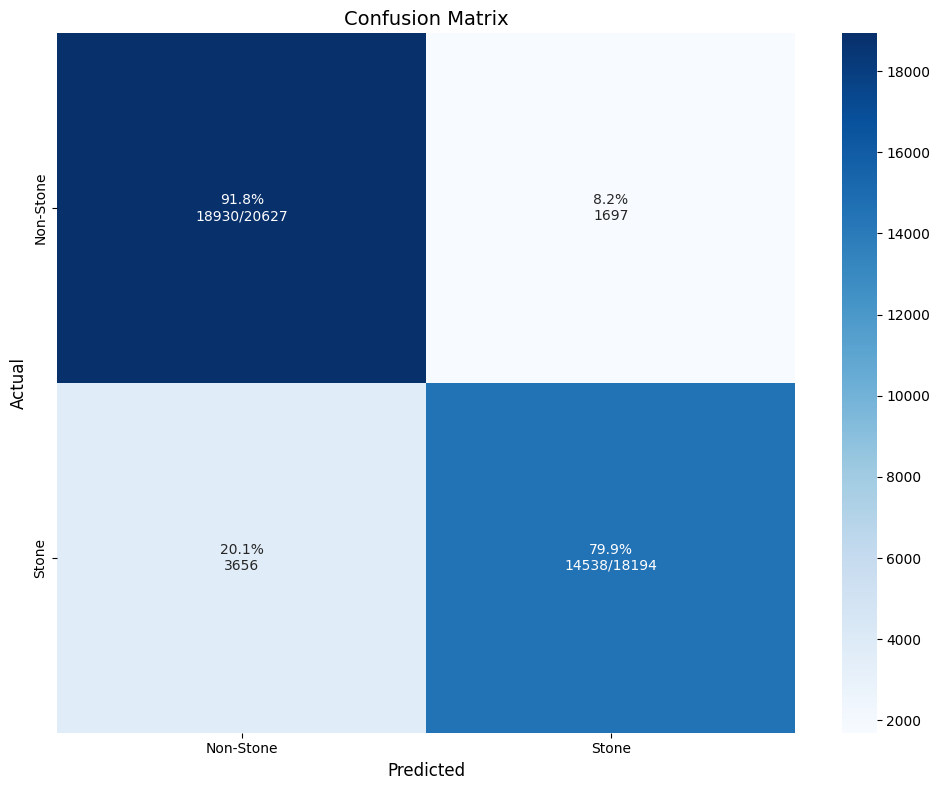

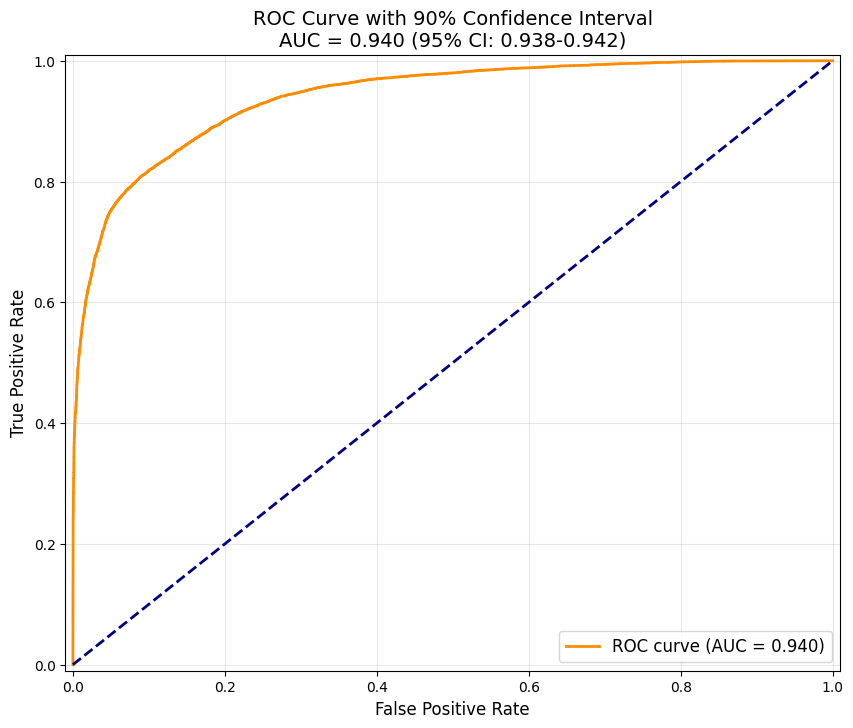

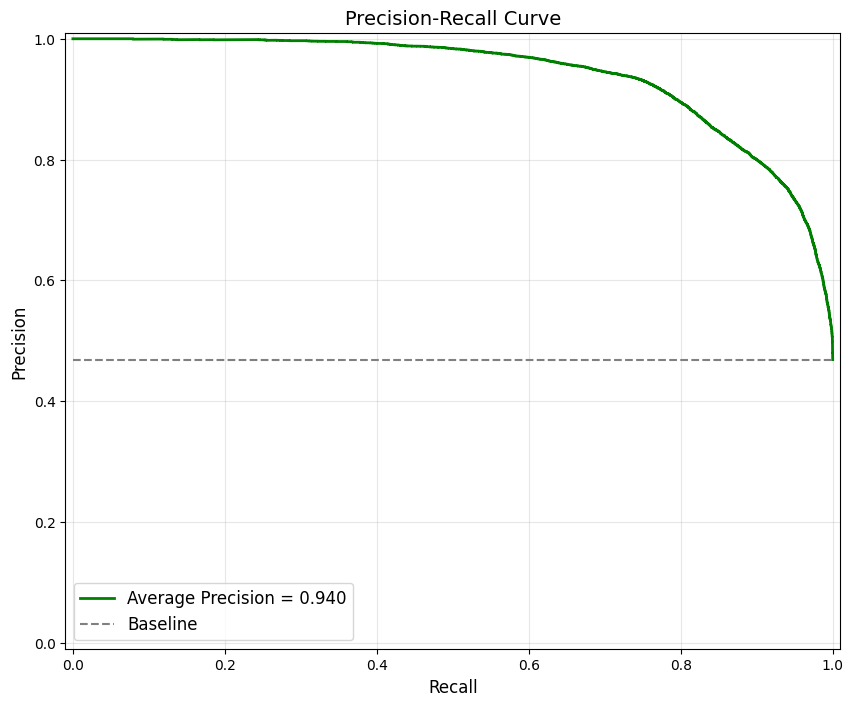

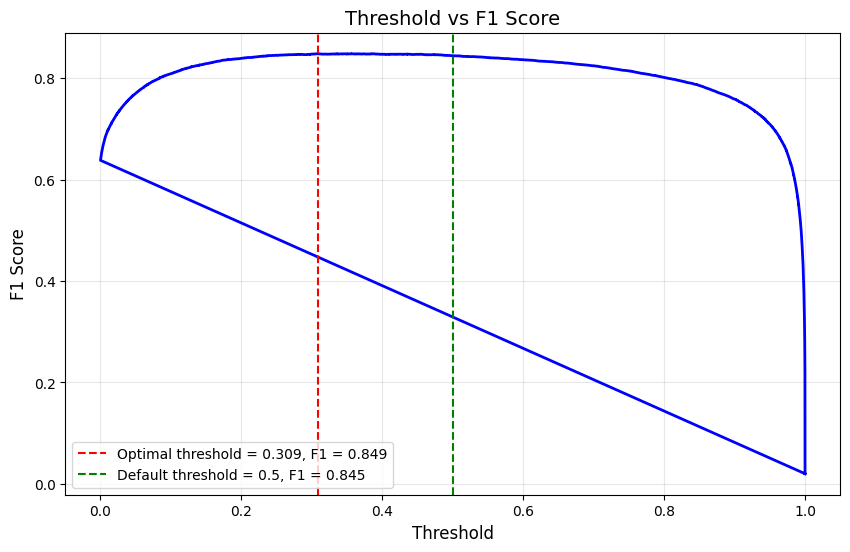

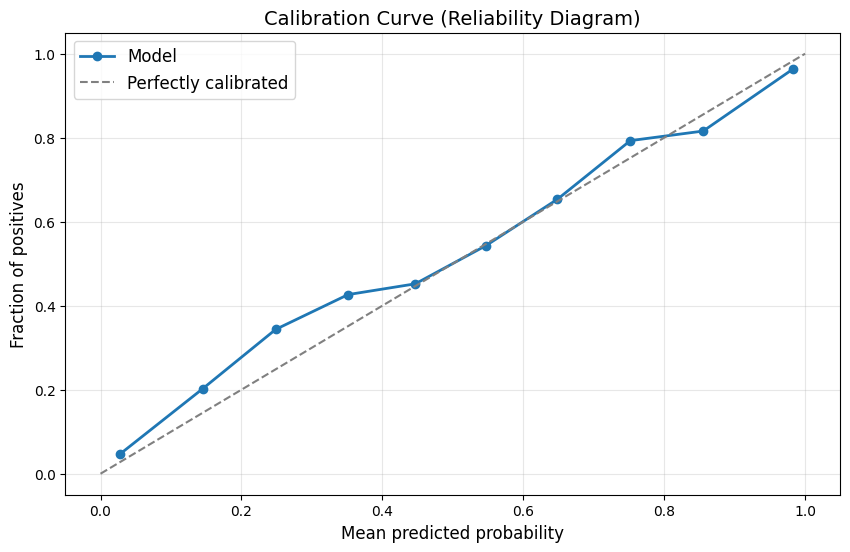

Number of misclassified samples: 5353
False Positives (Non-Stone predicted as Stone): 1697
False Negatives (Stone predicted as Non-Stone): 3656

Class-wise Metrics:
  Non-Stone:
    Precision: 0.8381
    Recall: 0.9177
    F1 Score: 0.8761
    Support: 20627
  Stone:
    Precision: 0.8955
    Recall: 0.7991
    F1 Score: 0.8445
    Support: 18194

=== MODEL EVALUATION SUMMARY ===

Model: Custom CNN for Kidney Stone Detection
Accuracy: 0.8621
Precision: 0.8955
Recall: 0.7991
F1 Score: 0.8445
ROC AUC: 0.9401

Optimal Threshold: 0.3087 (F1: 0.8485)
Default Threshold (0.5) F1: 0.8445

Misclassifications:
- False Positives (Non-Stone predicted as Stone): 1697
- False Negatives (Stone predicted as Non-Stone): 3656

Detailed metrics and visualizations saved to: artifacts\evaluation_results

Evaluation complete. Results saved to artifacts\evaluation_results


In [5]:
# Run the evaluation
metrics = evaluator.evaluate()